In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.cm import get_cmap
import seaborn as sns

In [2]:
ny_pois = np.loadtxt('./NYC_POIs/ny_municipality_pois_id.csv')
ds = pd.read_csv('./NYC_POIs/pois_all_info', header=0, low_memory=False, sep='\t', index_col='@id')

In [3]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77884 entries, 42432939 to 600931233
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   @type             77884 non-null  object 
 1   @lat              75789 non-null  float64
 2   @lon              75789 non-null  float64
 3   amenity           32271 non-null  object 
 4   name              40790 non-null  object 
 5   shop              12850 non-null  object 
 6   public_transport  10390 non-null  object 
 7   highway           9445 non-null   object 
dtypes: float64(2), object(6)
memory usage: 5.3+ MB


In [4]:
ds = ds.loc[ny_pois]
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53550 entries, 42432939 to 6146672068
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   @type             53550 non-null  object 
 1   @lat              53550 non-null  float64
 2   @lon              53550 non-null  float64
 3   amenity           24712 non-null  object 
 4   name              30550 non-null  object 
 5   shop              8717 non-null   object 
 6   public_transport  8376 non-null   object 
 7   highway           7559 non-null   object 
dtypes: float64(2), object(6)
memory usage: 3.7+ MB


In [5]:
ds = ds.reset_index()

In [6]:
ds.isnull().sum()

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28838
name                23000
shop                44833
public_transport    45174
highway             45991
dtype: int64

array([[<AxesSubplot:title={'center':'@id'}>,
        <AxesSubplot:title={'center':'@lat'}>],
       [<AxesSubplot:title={'center':'@lon'}>, <AxesSubplot:>]],
      dtype=object)

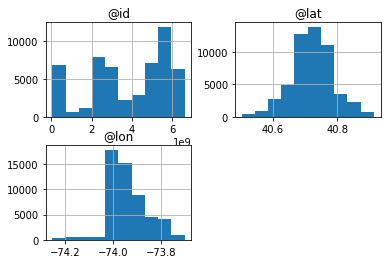

In [7]:
ds.hist()

In [8]:
plot = Counter(ds.amenity)

In [9]:
def get_categories():
    return ['amenity', 'shop', 'public_transport', 'highway']


In [10]:
ds.amenity.unique()

array([nan, 'ferry_terminal', 'drinking_water', 'toilets', 'fast_food',
       'grave_yard', 'school', 'place_of_worship', 'hospital',
       'university', 'social_facility', 'bicycle_parking', 'post_office',
       'restaurant', 'clinic', 'post_box', 'college',
       'research_institute', 'fountain', 'theatre', 'doctors',
       'arts_centre', 'cinema', 'bar', 'bench', 'embassy', 'courthouse',
       'community_centre', 'fire_station', 'library', 'kindergarten',
       'parking', 'public_building', 'dancing_school', 'police', 'prison',
       'townhall', 'pub', 'cafe', 'waste_basket', 'ice_cream',
       'veterinary', 'childcare', 'recycling', 'atm', 'telephone', 'fuel',
       'bank', 'marketplace', 'pharmacy', 'coworking_space', 'dentist',
       'motorcycle_parking', 'stripclub', 'bus_station', 'taxi',
       'parking_entrance', 'vending_machine', 'bbq', 'bureau_de_change',
       'car_rental', 'car_sharing', 'studio', 'nightclub', 'spa',
       'events_venue', 'bicycle_rental', '

In [11]:
def get_top_perc(series, perc_val=.8):
    perc = series.cumsum() / series.sum()
    arg = (perc > perc_val).values.argmax()

    return series.iloc[:arg + 1]

In [12]:
def plot_distribution(ds):

    p = .75
    for col in get_categories():
        val = ds[col].value_counts()
        valf = get_top_perc(val, p)
        fig, ax = plt.subplots()
        valf.plot(kind='bar', ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        fig.suptitle(f"Top {p*100:.0f}% points in the category: {col}")

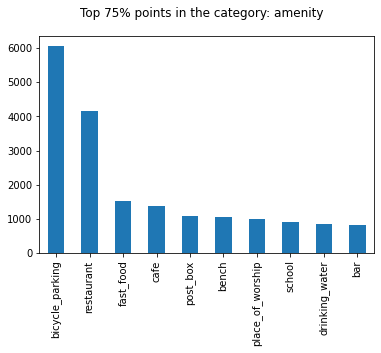

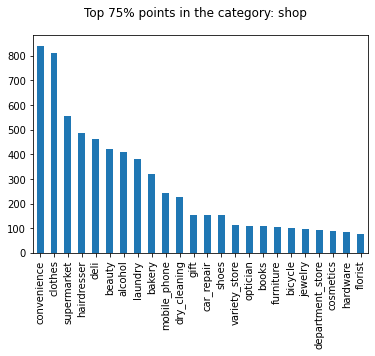

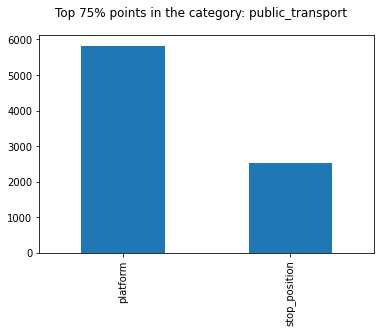

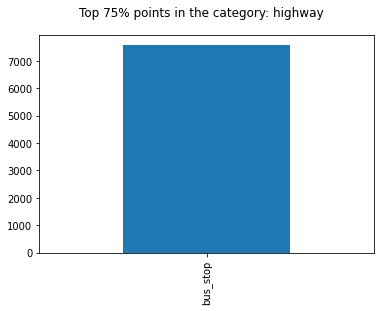

In [13]:
plot_distribution(ds)

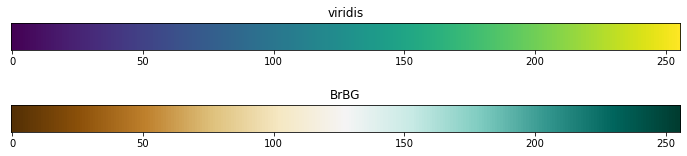

In [14]:


x = np.linspace(0, 1, 256)
x = np.vstack((x, x))
fig, axes = plt.subplots(nrows=2, figsize=(12,2))
plt.subplots_adjust(hspace=2) # adjust the vertical space between subplots

for ax, name in zip(axes, ['viridis', 'BrBG']):
    ax.imshow(x, aspect='auto', cmap=plt.get_cmap(name))
    ax.grid(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(name)

In [15]:
class Map:
    def __init__(self, df):
        """ Store Dataset with POIs information."""
        self.pois_df = df
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()

    def plot_map(self):
        """ Display an image with NY map and return the Axes object."""
        fig, ax = plt.subplots()
        nyc_img = plt.imread('./NYC_POIs/New_York_City_Map.PNG')
        ax.imshow(nyc_img, zorder=0, extent=[self.long_min,
                                             self.long_max,
                                             self.lat_min,
                                             self.lat_max])
        ax.grid(False)
        return ax

    def plot_pois(self, ax, category, mask):
        """Plot data on specified Axis."""
        df = self.pois_df.loc[mask]

        # Version 1: using pandas
        types = df[category].unique()
        cmap = get_cmap('viridis')
        colors = cmap(np.linspace(0, 1, types.size))
        for i, t in enumerate(types):
            df_t = df.loc[df[category] == t]
            c = [colors[i]] *  df_t.shape[0]
            df_t.plot.scatter(x='@lon', y='@lat', ax=ax, c=c, alpha=.6, label=t)

        # Version 2: using seaborn
        # sns.scatterplot(df['@lon'], df['@lat'], hue=df[category], ax=ax,
        #                 marker='o', s=3, linewidth=0, palette="viridis", legend='full')

        ax.legend() # show the legend, required by Version 1
        ax.grid(False)
        return ax

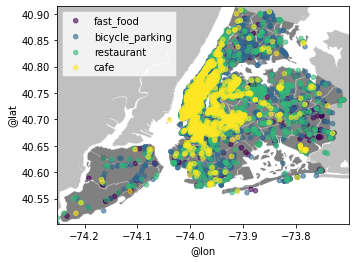

In [16]:
def show_category_on_map(df, column, perc_value):
    """
    Plot the New York map with POIs of a specific category.
    Only the top 'perc_value'% frequent types are plotted.
    """
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    ny_map = Map(df)

    ax = ny_map.plot_map()
    mask = df[column].isin(top_freq.index)
    ny_map.plot_pois(ax, column, mask)

show_category_on_map(ds, 'amenity', .5)

In [17]:
# Discretize the POIs by geographical position. Define a new function (or class) that is able to split the
# geographical position of the POIs using a grid. Once defined the grid over the New York municipality,
# the function has to assign each POI to the cell to which it belongs to. The result should be a Pandas
# DataFrame with a new column containing the cell_id for each POI.

class Cell_converter:
    def __init__(self, df, n_splits):
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()
        self.n_splits = n_splits

    def plot_grid(self, ax):
        lat_steps = np.linspace(self.lat_min, self.lat_max, self.n_splits + 1)
        long_steps = np.linspace(self.long_min, self.long_max, self.n_splits + 1)
        ax.hlines(lat_steps, self.long_min, self.long_max)
        ax.vlines(long_steps, self.lat_min, self.lat_max)

    def point_to_cell_coord(self, long, lat):
        x = int((long - self.long_min)/(self.long_max - self.long_min)*self.n_splits)
        y = int((lat - self.lat_min)/(self.lat_max - self.lat_min)*self.n_splits)
        return x, y

    def point_to_cell_id(self, long, lat):
        x, y = self.point_to_cell_coord(long, lat)
        return y * n_splits + x

n_splits = 20
cell_conv = Cell_converter(ds, n_splits)

ds['cell_id'] = ds.apply(lambda x: cell_conv.point_to_cell_id(x['@lon'], x['@lat']), axis=1)
ds.head()

,@id,@type,@lat,@lon,amenity,name,shop,public_transport,highway,cell_id
0,42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN,310
1,42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN,250
2,42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN,337
3,42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN,353
4,42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN,197


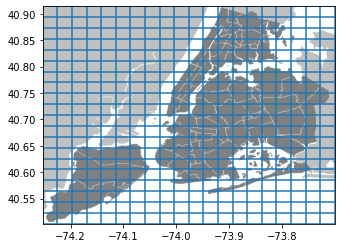

In [18]:
yet_another_map = Map(ds)
ax = yet_another_map.plot_map()
cell_conv.plot_grid(ax)

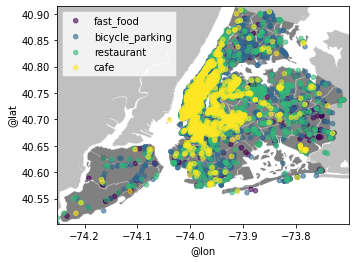

In [21]:
def show_category_on_map_v2q(df, column, perc_value):
    """
    Plot the New York map with POIs of a specific category.
    Only the top 'perc_value'% frequent types are plotted.
    """
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    ny_map = Map(df)

    ax = ny_map.plot_map()

    mask = df[column].isin(top_freq.index)
    cell_conv.plot_grid(ax)
    ny_map.plot_pois(ax, column, mask)

show_category_on_map(ds, 'amenity', .5)


<AxesSubplot:>

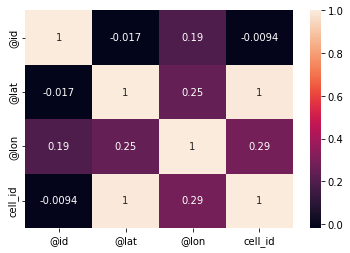

In [22]:
sns.heatmap(ds.corr(), annot = True, fmt='.2g')

In [26]:
# EX 1.6
def get_df_count(df, column, perc_value):
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    mask = df[column].isin(top_freq.index)
    freq_df = df.loc[mask]

    # for each cell_id count the number of POIs for each type
    count_dframe = []
    for cell_id in range(n_splits**2):
        count_vals = freq_df.loc[freq_df['cell_id'] == cell_id][column].value_counts()
        count_vals.name = cell_id
        count_dframe.append(count_vals)

    cells_features_df = pd.DataFrame(count_dframe)
    cells_features_df = cells_features_df.fillna(0)
    return cells_features_df

amenities_df = get_df_count(ds, 'amenity', .7)
amenities_df.head()

,school,restaurant,post_box,place_of_worship,fast_food,drinking_water,bicycle_parking,cafe,bench
0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
shop_df = get_df_count(ds, 'amenity', .7)
shop_df.head()

,school,restaurant,post_box,place_of_worship,fast_food,drinking_water,bicycle_parking,cafe,bench
0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
final_df = pd.concat([amenities_df, shop_df], axis=1)

In [29]:
final_corr = final_df.corr()
final_corr.head()

,school,restaurant,post_box,place_of_worship,fast_food,drinking_water,bicycle_parking,cafe,bench,school,restaurant,post_box,place_of_worship,fast_food,drinking_water,bicycle_parking,cafe,bench
school,1.000000,0.537456,0.576713,0.681234,0.479158,0.642189,0.544170,0.506902,0.255120,1.000000,0.537456,0.576713,0.681234,0.479158,0.642189,0.544170,0.506902,0.255120
restaurant,0.537456,1.000000,0.738146,0.303759,0.892643,0.625861,0.933327,0.977129,0.325605,0.537456,1.000000,0.738146,0.303759,0.892643,0.625861,0.933327,0.977129,0.325605
post_box,0.576713,0.738146,1.000000,0.491305,0.791383,0.709705,0.757908,0.751239,0.464872,0.576713,0.738146,1.000000,0.491305,0.791383,0.709705,0.757908,0.751239,0.464872
place_of_worship,0.681234,0.303759,0.491305,1.000000,0.317428,0.472560,0.321243,0.257439,0.219545,0.681234,0.303759,0.491305,1.000000,0.317428,0.472560,0.321243,0.257439,0.219545
fast_food,0.479158,0.892643,0.791383,0.317428,1.000000,0.554166,0.823712,0.931877,0.463410,0.479158,0.892643,0.791383,0.317428,1.000000,0.554166,0.823712,0.931877,0.463410


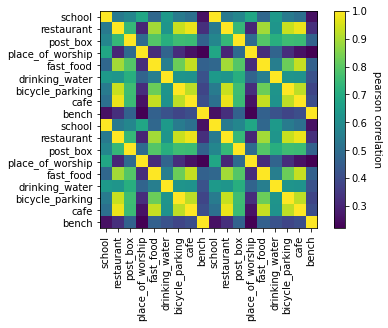

In [30]:

# Version 1
fig, ax = plt.subplots()
im = ax.imshow(final_corr)
ax.set_xticks(np.arange(final_corr.columns.size))
ax.set_yticks(np.arange(final_corr.columns.size))
ax.set_xticklabels(final_corr.columns)
ax.set_yticklabels(final_corr)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", va="center",
         rotation_mode="anchor") # rotate labels on x-axis
cbar = ax.figure.colorbar(im, ax=ax)
_ = cbar.ax.set_ylabel('pearson correlation', rotation=-90, va="bottom")

<AxesSubplot:>

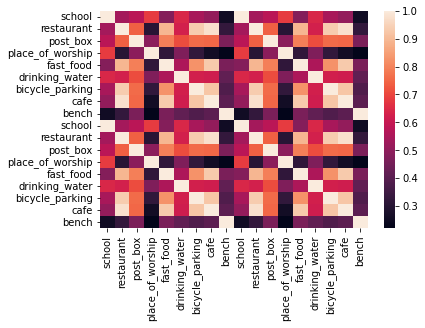

In [31]:
# Version 2
sns.heatmap(final_corr)